# **Random forest**

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

**Loading dataset**

In [ ]:
df = pd.read_csv('dataset2.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.7,12.2,4.05,13.7,211,30.1,34.2,88.1,67,M,in
1,30.1,10.0,3.18,17.6,198,31.4,33.2,94.7,83,M,in
2,30.2,9.3,4.28,4.3,251,21.7,30.8,70.6,25,F,in
3,42.8,14.6,4.60,9.8,300,31.7,34.1,93.0,60,F,out
4,41.2,13.5,5.20,6.5,510,26.0,32.8,79.2,45,F,out


# Statistical info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   1985 non-null   float64
 1   HAEMOGLOBINS  1985 non-null   float64
 2   ERYTHROCYTE   1985 non-null   float64
 3   LEUCOCYTE     1985 non-null   float64
 4   THROMBOCYTE   1985 non-null   int64  
 5   MCH           1985 non-null   float64
 6   MCHC          1985 non-null   float64
 7   MCV           1985 non-null   float64
 8   AGE           1985 non-null   int64  
 9   SEX           1985 non-null   object 
 10  SOURCE        1985 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 170.7+ KB
None


In [ ]:
df.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,38.225290,12.757531,4.546373,8.862720,260.300252,28.235869,33.354660,84.591385,46.849874
std,6.049556,2.103452,0.795362,5.300111,117.491633,2.655978,1.211046,6.849893,21.747952
min,13.700000,4.400000,1.480000,1.400000,8.000000,14.900000,26.400000,54.000000,1.000000
25%,34.300000,11.400000,4.060000,5.800000,188.000000,27.100000,32.700000,81.300000,29.000000
50%,38.700000,12.900000,4.580000,7.600000,258.000000,28.700000,33.400000,85.300000,48.000000
75%,42.600000,14.300000,5.060000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,57.000000,18.800000,7.860000,76.600000,1183.000000,40.800000,38.300000,115.600000,98.000000


In [ ]:
filtered_data = df[df['AGE'] > 30]
filtered_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.7,12.2,4.05,13.7,211,30.1,34.2,88.1,67,M,in
1,30.1,10.0,3.18,17.6,198,31.4,33.2,94.7,83,M,in
3,42.8,14.6,4.60,9.8,300,31.7,34.1,93.0,60,F,out
4,41.2,13.5,5.20,6.5,510,26.0,32.8,79.2,45,F,out
5,32.0,10.7,3.87,11.3,265,27.6,33.4,82.7,86,F,in
...,...,...,...,...,...,...,...,...,...,...,...
1978,43.4,14.7,4.57,11.6,285,32.2,33.9,95.0,59,M,in
1979,48.4,16.0,5.67,3.0,60,28.2,33.1,85.4,62,F,out
1980,30.8,11.5,4.05,34.9,523,28.4,37.3,76.0,66,M,out
1982,47.0,16.0,5.31,5.0,238,30.1,34.0,88.5,61,M,out


In [ ]:
sorted_df = df.sort_values(by='AGE', ascending=False)
sorted_df

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
128,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in
1729,39.5,12.8,4.18,7.6,337,30.6,32.4,94.5,92,F,out
158,23.2,7.7,2.55,10.2,134,30.2,33.2,91.0,92,F,out
516,31.9,10.3,3.42,8.7,110,30.1,32.3,93.3,92,F,in
1607,33.7,10.4,3.48,11.4,112,29.9,30.9,96.8,92,F,in
...,...,...,...,...,...,...,...,...,...,...,...
1563,54.0,16.6,7.61,10.0,88,21.8,30.7,71.0,1,F,in
817,33.7,11.5,4.57,13.2,322,25.2,34.1,73.7,1,M,out
996,34.3,11.6,4.53,6.6,185,25.6,33.8,75.7,1,M,out
123,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out


In [ ]:
grouped_data = df.groupby('SEX')['AGE'].mean()
grouped_data

SEX
F    46.124336
M    47.503831
Name: AGE, dtype: float64

In [ ]:
print(df.isnull().sum())

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64


# Visualization

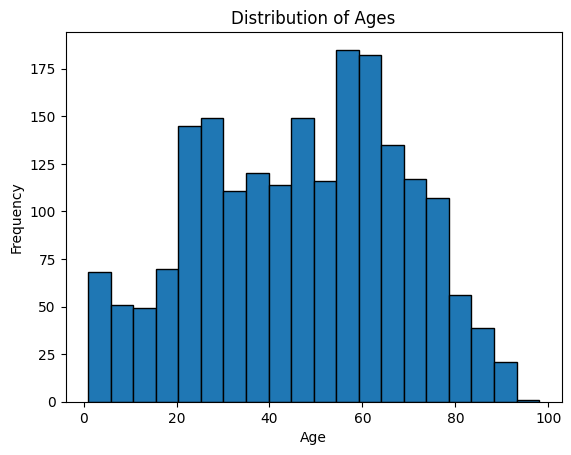

In [ ]:
df['AGE'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

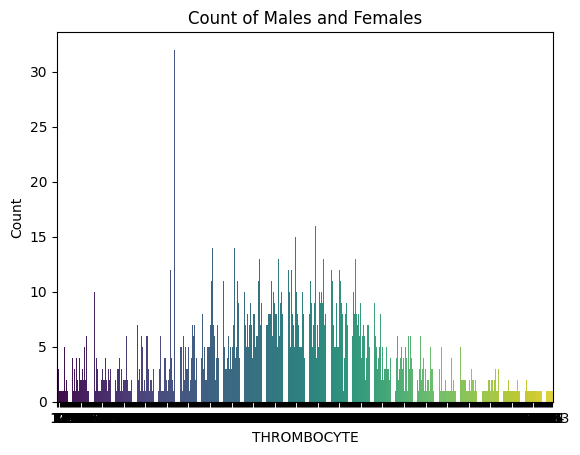

In [ ]:
sns.countplot(x='THROMBOCYTE', data=df, palette='viridis')
plt.title('Count of Males and Females')
plt.xlabel('THROMBOCYTE')
plt.ylabel('Count')
plt.show()

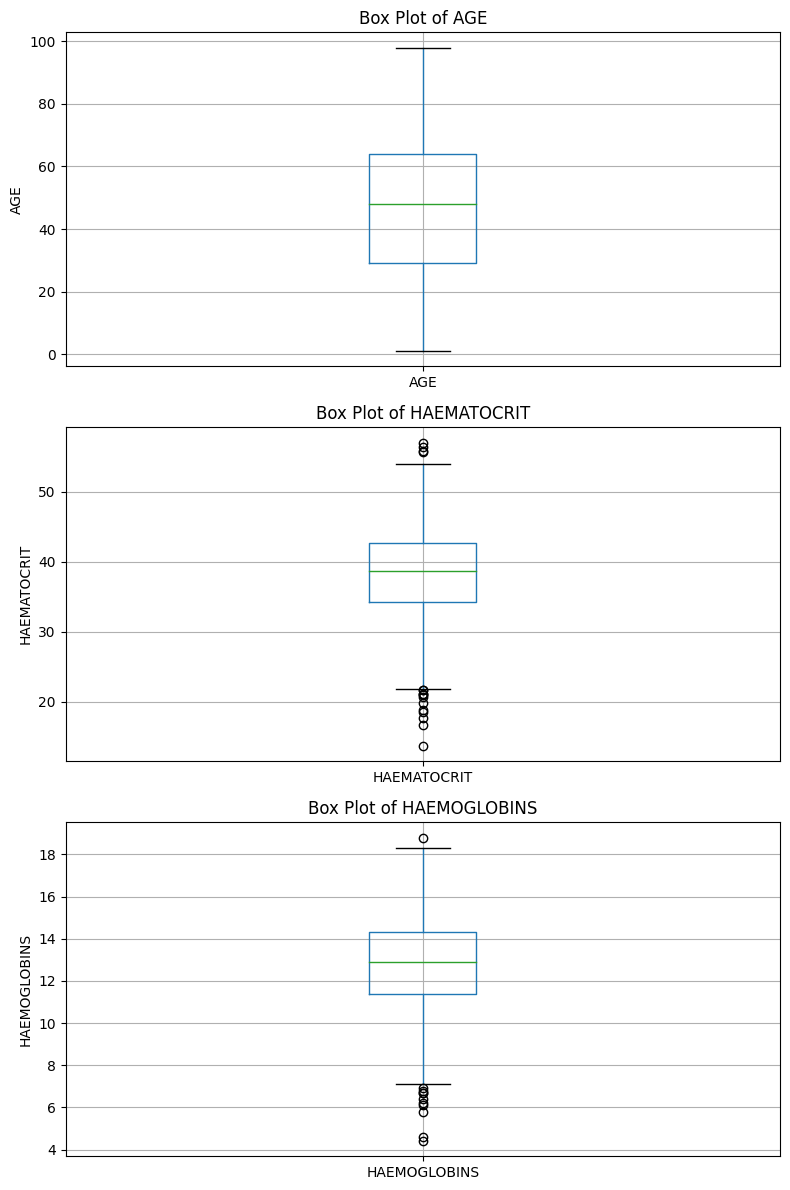

In [ ]:
attributes_of_interest = ['AGE', 'HAEMATOCRIT', 'HAEMOGLOBINS']

fig, axes = plt.subplots(nrows=len(attributes_of_interest), ncols=1, figsize=(8, 4 * len(attributes_of_interest)))

for i, attribute in enumerate(attributes_of_interest):
    df.boxplot(column=attribute, ax=axes[i])
    axes[i].set_title(f'Box Plot of {attribute}')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.show()

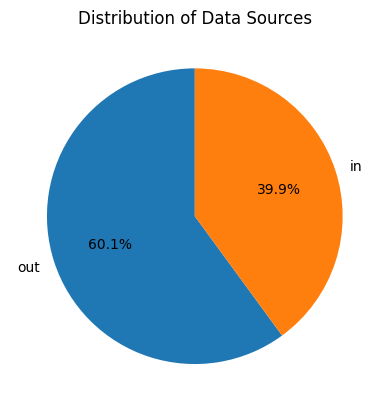

In [ ]:
source_counts = df['SOURCE'].value_counts()
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Data Sources')
plt.show()

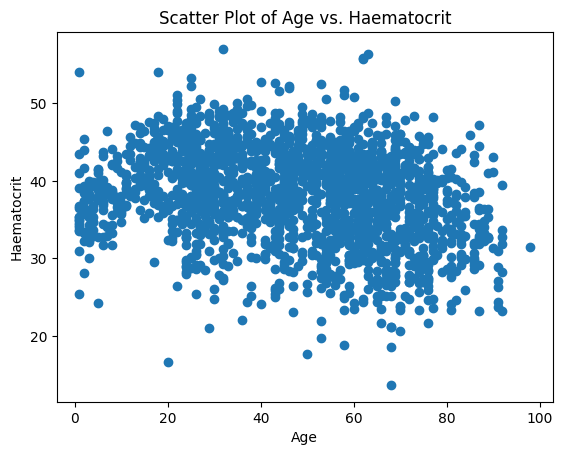

In [ ]:
plt.scatter(df['AGE'], df['HAEMATOCRIT'])
plt.title('Scatter Plot of Age vs. Haematocrit')
plt.xlabel('Age')
plt.ylabel('Haematocrit')
plt.show()

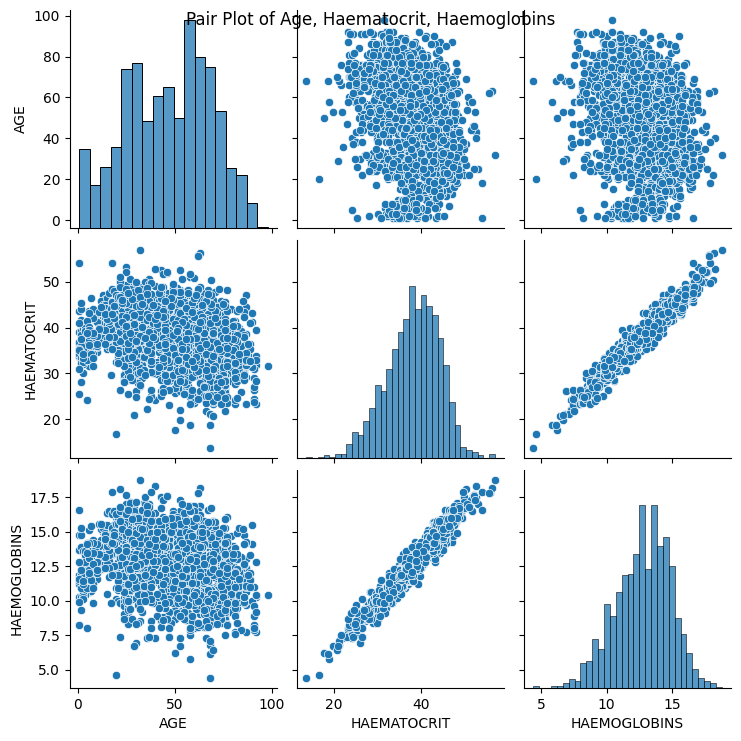

In [ ]:
sns.pairplot(df[['AGE', 'HAEMATOCRIT', 'HAEMOGLOBINS']])
plt.suptitle('Pair Plot of Age, Haematocrit, Haemoglobins')
plt.show()

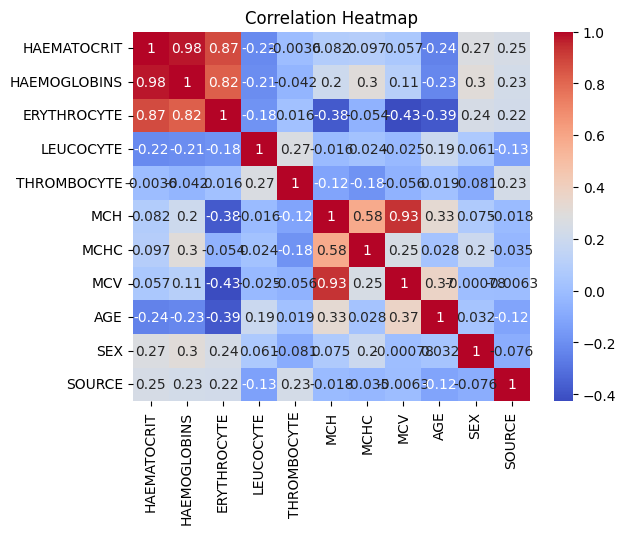

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

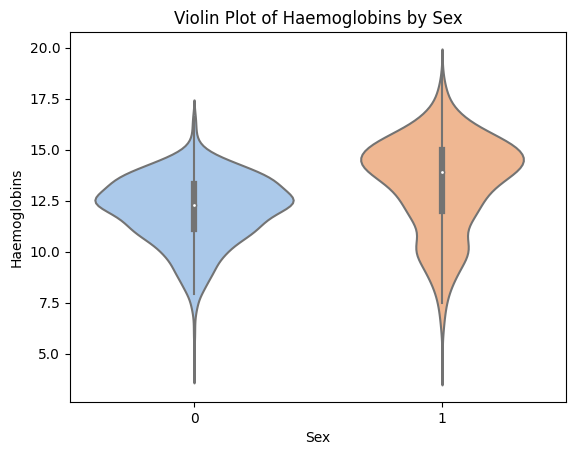

In [ ]:
sns.violinplot(x='SEX', y='HAEMOGLOBINS', data=df, palette='pastel')
plt.title('Violin Plot of Haemoglobins by Sex')
plt.xlabel('Sex')
plt.ylabel('Haemoglobins')
plt.show()

<ipython-input-48-47249e8b84eb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='SOURCE', y='HAEMOGLOBINS', data=df, ci='sd', palette='muted')


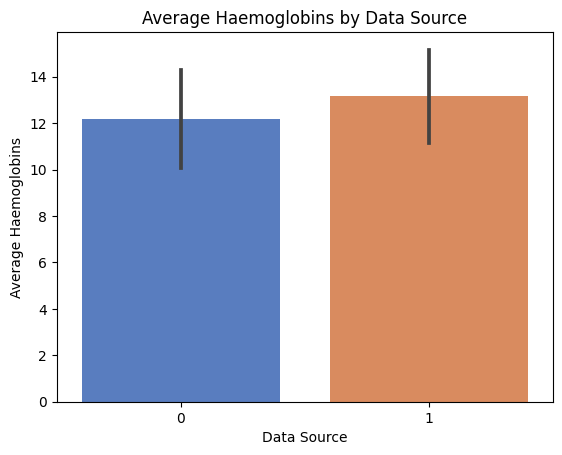

In [ ]:
sns.barplot(x='SOURCE', y='HAEMOGLOBINS', data=df, ci='sd', palette='muted')
plt.title('Average Haemoglobins by Data Source')
plt.xlabel('Data Source')
plt.ylabel('Average Haemoglobins')
plt.show()

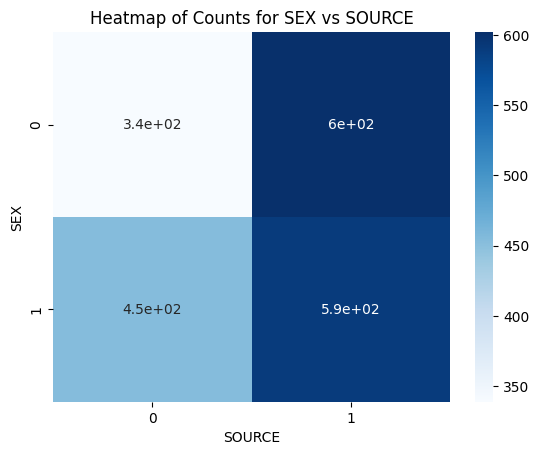

In [ ]:
heatmap_data = pd.crosstab(df['SEX'], df['SOURCE'])
sns.heatmap(heatmap_data, annot=True, cmap='Blues')
plt.title('Heatmap of Counts for SEX vs SOURCE')
plt.xlabel('SOURCE')
plt.ylabel('SEX')
plt.show()

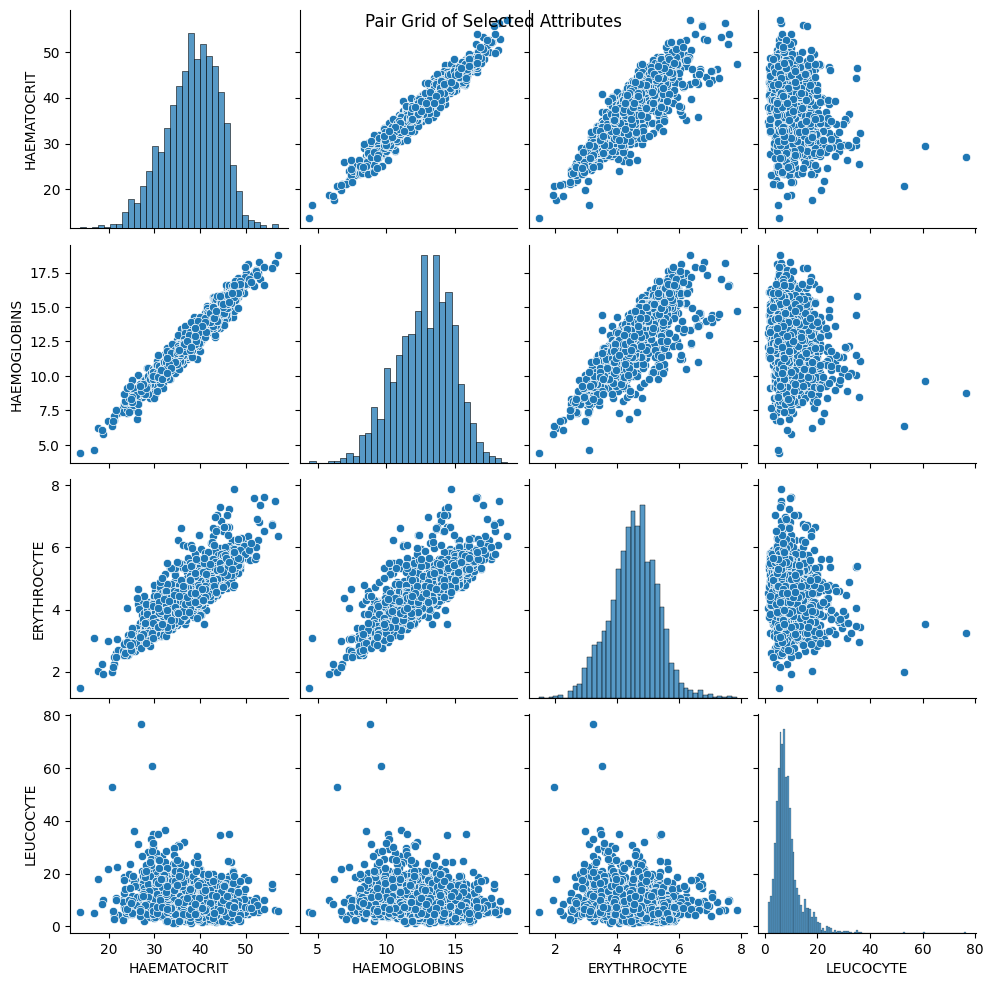

In [ ]:
attributes_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE']
sns.pairplot(df[attributes_of_interest])
plt.suptitle('Pair Grid of Selected Attributes')
plt.show()

# Random forests

**Label encoding**

In [ ]:
categorical_columns = ['SEX', 'SOURCE']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.7          12.2         4.05       13.7          211  30.1  34.2   
1         30.1          10.0         3.18       17.6          198  31.4  33.2   
2         30.2           9.3         4.28        4.3          251  21.7  30.8   
3         42.8          14.6         4.60        9.8          300  31.7  34.1   
4         41.2          13.5         5.20        6.5          510  26.0  32.8   

    MCV  AGE  SEX  SOURCE  
0  88.1   67    1       0  
1  94.7   83    1       0  
2  70.6   25    0       0  
3  93.0   60    0       1  
4  79.2   45    0       1  


In [ ]:
X = df.drop('SOURCE', axis=1)
y = df['SOURCE']

**Test-train split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

**Accuracy and classification report**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.72
Confusion Matrix:
[[ 81  74]
 [ 36 206]]
Classification Report:
              precision    recall  f1-score   support

          in       0.69      0.52      0.60       155
         out       0.74      0.85      0.79       242

    accuracy                           0.72       397
   macro avg       0.71      0.69      0.69       397
weighted avg       0.72      0.72      0.71       397



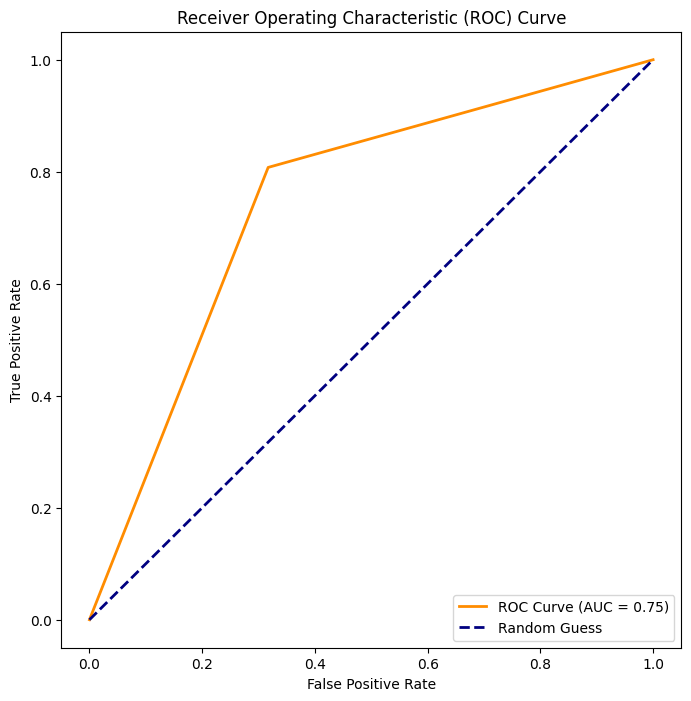

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Other datasets

In [ ]:
df=pd.read_csv('dataset1.csv')
categorical_columns = ['SEX', 'SOURCE']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('SOURCE', axis=1)
y = df['SOURCE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.74
Confusion Matrix:
[[109  68]
 [ 57 252]]
Classification Report:
              precision    recall  f1-score   support

          in       0.66      0.62      0.64       177
         out       0.79      0.82      0.80       309

    accuracy                           0.74       486
   macro avg       0.72      0.72      0.72       486
weighted avg       0.74      0.74      0.74       486



In [ ]:
df=pd.read_csv('dataset3.csv')
categorical_columns = ['SEX', 'SOURCE']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('SOURCE', axis=1)
y = df['SOURCE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[ 81  51]
 [ 41 133]]
Classification Report:
              precision    recall  f1-score   support

          in       0.66      0.61      0.64       132
         out       0.72      0.76      0.74       174

    accuracy                           0.70       306
   macro avg       0.69      0.69      0.69       306
weighted avg       0.70      0.70      0.70       306



In [ ]:
df=pd.read_csv('dataset4.csv')
categorical_columns = ['SEX', 'SOURCE']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop('SOURCE', axis=1)
y = df['SOURCE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.76
Confusion Matrix:
[[ 84  39]
 [ 45 189]]
Classification Report:
              precision    recall  f1-score   support

          in       0.65      0.68      0.67       123
         out       0.83      0.81      0.82       234

    accuracy                           0.76       357
   macro avg       0.74      0.75      0.74       357
weighted avg       0.77      0.76      0.77       357

